# Introduction to Machine Learning with scikit-learn
### Rachel Rakov
Welcome!  In this workshop, we are going to learn how to go through the process of doing *machine learning* on a set of data.   To do so, we will download a *corpus* of text data to work with, extract *features* from this data, and do *supervised* machine learning to our data, using a mathmatical algorithm to train a *classifier* which will then classify previously unseen data into a set of predefined categories.


"Machine learning is a research field that sits at the intersections of statistics, artificial intelligence, and computer science.  It is also known as *predictive analystics* or *statistical learning*."

-- Andreas Mueller, "Introduction to Machine Learning with Python".

## Key terms
- *machine learning*: An application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed


- *corpus*: A large collection of data.  In our case, this will be text data (although a corpus can contain any type of data)


- *features*: Properties that describe data entities for machine learning


- *feature representation, feature vector*: A set of features


- *supervised machine learning*:  A machine learning task of learning a function that maps an input to an output based on example input-output pairs


- *unsupervised machine learning*: A machine learning task used to draw inferences from datasets consisting of input data without labeled responses (lacks input-output pairs; only has input data)


- *algorithm*: A process or set of rules to be followed in calculations (or other problem-solving operations), particularly by a computer


- *classification*: An machine learning task used to predict a class label, which is a choice from a predefined list of possibilities

Sources: Wikipedia, Andreas Mueller's "Introduction to Machine Learning with Python"


## Goals of this workshop
In this workshop, you will learn the following skills:
- How to use skills from the NLTK workshop to build features for a classification task
- How to build a text classification system that can predict whether sentences belong to one category ("news") or another ("romance")
- How to prepare data for machine learning using *pandas*, a package for Python that helps to organize your data
    - Looks similar to an Excel spreadsheet
- How to use the scikit-learn package for Python to perform machine learning on the data
- How to evaluate the results of the classifier, helping to decide whether the classifier is effective
- How to adjust paramaters of a classifier to improve accuracy

### What do you need for this workshop?
- Python 3
    - You can also download the Jupyter Notebook for this lesson to follow along
- The Natural Lanugage Toolkit
    - We will be using both corpora and tools from this package
- pandas 
    - We will use this for data processing
    - Comes with Anaconda
- matplotlib
    - We will use this for visualizing our data
    - Comes with Anaconda
- sckiit-learn
    - We will use this for machine learning
    - Comes with Anaconda 

### Let's get started by importing some packages we will need for this workshop!
- The Brown Corpus: A text corpus of American English, split into fifteen different categories
- Part of speech taggers (POS): prebuilt functions that are designed to determine the part of speech of every word in the sentence you give them
- Pandas as pd: importing the Pandas toolkit and renaming it pd, so we don't have to type too much
- matplotlib.pyplot as plt: importing plotting tools from matplotlib and renaming them plt
    - ~~~
    %matplotlib inline
    ~~~
    We use the above code to ensure our images display clearly in the Jupyter notebook.

- sklearn: the scikit-learn machine learning toolkit



In [3]:
import nltk
from nltk.corpus import brown
from nltk import pos_tag_sents
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## What is classification?  Let's show an example using fruit!

### How would you describe apples to a computer?  How would they differ from oranges?
Remember, computers can only really understand numbers, true false values, and strings within a predefined set

![fruit3](images/fruit3.png)
Source: Andrew Rosenberg


Our fruit test shows us everything we need to do a classification machine learning test. For each item with a *label* (apple, orange, lemon), we use a series of values to try to capture machine-understandable information about the item.  These values are a *feature representation* of the item in question.  The features themselves, as we can see above, can be numeric, true/false values, or a string in a set of predefined strings.





### What if we had a new, unknown fruit?
![fruit2](images/fruit2.png)
Source: Andrew Rosenberg


Our fruit test is an example of a *classification* task.  Classification allows you to predict a *categorical* value.  This is a type of *supervised* machine learning, meaning we know the labels ahead of time and can give them to the machine learning algorithm so that it can be trained to knows what the categories of our data are.  This way, when it comes time to give the previously algorithm previously unseen data, it knows which categories it's looking for.

### Let's get to coding!
In this workshop we are going to *classify* two different sets of sentences from very different source material in the Brown corpus; one set of sentences from a corpus of news text, and the other set of sentences from a corpus of romance novel text. 

In [16]:
from nltk.corpus import brown

#### For a list of catorigies in the Brown corpus, use the following code

In [17]:
for cat in brown.categories():
    print (cat)

adventure
belles_lettres
editorial
fiction
government
hobbies
humor
learned
lore
mystery
news
religion
reviews
romance
science_fiction


#### Get the sentences from each corpus

In [18]:
news_sent = brown.sents(categories=["news"])
romance_sent = brown.sents(categories=["romance"])

### Practice 1:  Look at the first 5 sentences of each corpus
- What do you notice about the format of the data?

In [19]:
print (news_sent[:5])
print ()
print (romance_sent[:5])


[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

In [20]:
print (news_sent[:5])
print ()
print (romance_sent[:5])


[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

### What do you notice about the format of the data above?
Each sentence is already *tokenized* - split into a series of word and punctuation stringes, with whitespace removed. This saves us the time of having to do all of this work ourselves!

# Using data structures to manage data

To start to organize our data, let's put these sentences into a pandas *DataFrame*, an object which has a format very similar to an Excel spreadsheet.  We will first make two spreadsheets (one for news, and one for romance), and then combine them into one.  We will also add the category each sentences came from, which will be our *labels* for each sentence and its associated feature representation (which we will build ourselves).

In [21]:
ndf = pd.DataFrame({'sentence': news_sent,
                    'label':'news'})
rdf = pd.DataFrame({'sentence':romance_sent, 
                    'label':'romance'})

In [22]:
# combining two spreadsheets into 1
df = pd.concat([ndf, rdf])

Let's see what this DataFrame looks like!

In [23]:
df 

,label,sentence
0,news,"[The, Fulton, County, Grand, Jury, said, Frida..."
1,news,"[The, jury, further, said, in, term-end, prese..."
2,news,"[The, September-October, term, jury, had, been..."
3,news,"[``, Only, a, relative, handful, of, such, rep..."
4,news,"[The, jury, said, it, did, find, that, many, o..."
5,news,"[It, recommended, that, Fulton, legislators, a..."
6,news,"[The, grand, jury, commented, on, a, number, o..."
7,news,"[Merger, proposed]"
8,news,"[However, ,, the, jury, said, it, believes, ``..."
9,news,"[The, City, Purchasing, Department, ,, the, ju..."


In [24]:
df.head()

,label,sentence
0,news,"[The, Fulton, County, Grand, Jury, said, Frida..."
1,news,"[The, jury, further, said, in, term-end, prese..."
2,news,"[The, September-October, term, jury, had, been..."
3,news,"[``, Only, a, relative, handful, of, such, rep..."
4,news,"[The, jury, said, it, did, find, that, many, o..."


### So how many texts do we have of each type?

In [25]:
df['label'].value_counts()

news       4623
romance    4431
Name: label, dtype: int64

### What if we want to visualize that information?
We first create a `figure` and `axes` on which to draw our charts using `plt.subplots()`. Each chart is one axes, and a figure can contain multiple charts. Our data is encapsulated in `df['label'].value_counts()`, which is itself a dataframe. We then tell the Pandas to visualize the dataframe as a bar chart using `.plot.bar(ax=ax, rot=0)`. The `ax` keyword tells Pandas which chart in the figure to plot, and the `rot` keyword controls the rotation of the x axis labels. 

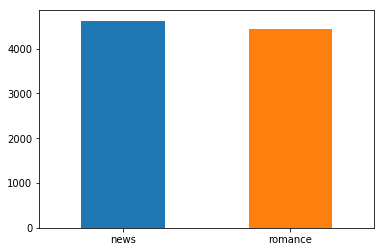

In [26]:
fig, ax = plt.subplots()
_ = df['label'].value_counts().plot.bar(ax=ax, rot=0)

We have slightly more news texts than romance texts, which we should keep in mind as we go ahead with classification.

### What should we use as features for our data set?  What did we use as features for our fruit example before?
![fruit3](images/fruit3.png)

### Now that we are using sentences, how can we best repersent each sentence as a series of values?

One idea is to use how many particular *parts of speech* the sentence contains.

- Nouns: Most basically described as a person, place, or thing.  Counting nouns can help determine how many topics are being discussed in a sentence.
- Adjectives: Descriptors of nouns (eg. "yellow", "angry", "charming").  Counting adjectives can help determine how often descriptive words are being added to nouns, which can demonstrate writing style.
- Adverbs: Descriptors of verbs (eg. "quickly", "hungrily", "annoyingly").  Counting adverbs can help determine how often the manner of the verb is modified, which can also demonstrate writing style.

#### Why might we want to use these parts of speech to distinguish between news sentences and romance sentences?


We will now compute all of the parts of speech on each sentence (row) in our dataframe.

### Practice 2:  Get the part of speech tags for each sentence in the dataframe
- Hint: 
~~~
df['sentence']
~~~

In [30]:
# compute parts of speech on each sentence (row)
pos_all = pos_tag_sents(df['sentence'])
print (pos_all[:5])

[[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NNP'), ('recent', 'JJ'), ('primary', 'JJ'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'DT'), ('evidence', 'NN'), ("''", "''"), ('that', 'IN'), ('any', 'DT'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'DT'), ('jury', 'NN'), ('further', 'RB'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'JJ'), ('presentments', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('Executive', 'NNP'), ('Committee', 'NNP'), (',', ','), ('which', 'WDT'), ('had', 'VBD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'DT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'DT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('of', 'IN'), ('Atlanta', 'NNP'), ("''", "

### What's with those part of speech labels?  They aren't helpful at all!
The Penn Tagset, which NLTK uses for it's part of speech tagger, is not particularly intuitive.  Fortunately, they provide code that allows you to check what different tags stand for.

In [32]:
# troubleshooting: https://github.com/nltk/nltk/issues/919
nltk.help.upenn_tagset("NN")
nltk.help.upenn_tagset("JJ")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


### Write a function that calculates our features for us 
#### (In this case, numbers of nouns, adjectives, and adverbs that appear in the sentence)

Now we know the tags for the different parts of speech we want to count in each sentence.  Let's now write a function that will count the parts of speech to us, when given a part of speech tagged sentence (such as we have already in our DataFrame) and the part of speech we want to count (for example, "NN" to count the number of nouns in the sentence).

In [33]:
def countPOS(pos_tag_sent, POS):
    pos_count = 0
    all_pos_counts = []
    for sentence in pos_tag_sent:
        for word in sentence:
            tag = word[1]
            if tag [:2] == POS:  
                pos_count = pos_count+1
        all_pos_counts.append(pos_count)
        pos_count = 0
    return all_pos_counts

We will now call this function three different times, one for each of the parts of speech we are counting.  As we finish counting them, we put the results into the DataFrame, saving us the trouble of having to do so later.

In [34]:
df['NN'] = countPOS(pos_all, 'NN')
df['JJ'] = countPOS(pos_all, "JJ")

In [35]:
df.head()

,label,sentence,NN,JJ
0,news,"[The, Fulton, County, Grand, Jury, said, Frida...",11,2
1,news,"[The, jury, further, said, in, term-end, prese...",13,2
2,news,"[The, September-October, term, jury, had, been...",16,2
3,news,"[``, Only, a, relative, handful, of, such, rep...",9,3
4,news,"[The, jury, said, it, did, find, that, many, o...",5,3


In [36]:
df.tail()

,label,sentence,NN,JJ
4426,romance,"[Nobody, else, showed, pleasure, .]",2,0
4427,romance,"[Spike-haired, ,, burly, ,, red-faced, ,, deck...",9,3
4428,romance,"[``, Hello, ,, boss, '', ,, he, said, ,, and, ...",2,0
4429,romance,"[``, I, suppose, I, can, never, expect, to, ca...",3,0
4430,romance,"[``, I'm, afraid, not, '', .]",1,0


### So how many POS types do we have for each type of text?
We can use the Pandas groupby function to aggregate our data based on unique values in any column of the data. Here we seperate our data into groups by the label type (news or romance) and then add together each texts count of nouns, adjectives, and adverbs. 

In [37]:
df.groupby('label').sum()

,NN,JJ
label,,
news,31593,6678
romance,13821,4022


### Let's visualize this data!
What do you notice about the data?  Do you think our features will be good at predicting news and romance sentences?  Which features do you think will be the most useful?

We can rotate the table using `.T` (transpose), which also changes the grouping of the data being plotted. 

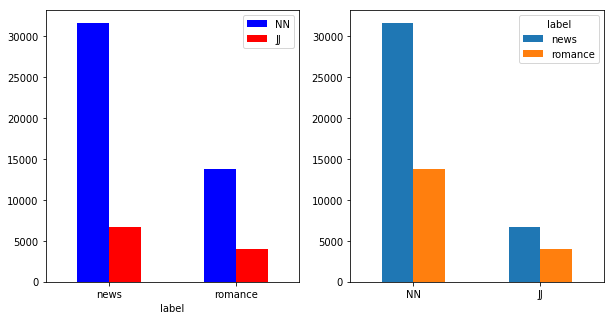

In [58]:
fig, (ax1,ax2) = plt.subplots(ncols=2,  figsize=(10,5))
_ = df.groupby('label').sum().plot.bar(ax=ax1, rot=0, color=['blue', 'red'])
_ = df.groupby('label').sum().T.plot.bar(ax=ax2, color=['tab:blue','tab:orange'], rot=0)



# Are there patterns in the individual observations
We can make a scatter plot of our data colored by label to see if the patterns observed in the aggregate are visible in the individual observations. Since 3D scatter plots are really hard to visualize cleanly, we will generate a matrix of scatter plots to visualize whether the data seperates on the feature vectors. We will use the seaborn visualization library because it plots categorical data well. 

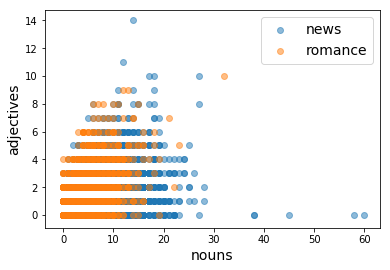

In [59]:
# seperate our data into the two classes
news = df[df['label']=='news']
romance = df[df['label']=='romance']

fig, ax = plt.subplots()
_ = ax.scatter(news['NN'], news['JJ'], label="news", alpha=.5)
_ = ax.scatter(romance['NN'], romance['JJ'], label="romance", alpha=.5)
_ = ax.legend(fontsize=14)
_ = ax.set_xlabel("nouns", fontsize=14)
_ = ax.set_ylabel("adjectives", fontsize=14)

### Practice 3:  Save the dataframe to your computer as a csv file (comma separated value)

- Hint:
~~~
.to_csv()
~~~


In [39]:
df.to_csv("df_news_romance.csv", index=False)